# 5G NIDD Dataset preprocessing and spliting

We will treat this dataset as a concurrent type instead of sequential

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', None)

In [2]:
file_path = 'Data/Datasets/5G NIDD/Combined.csv'
if os.path.exists(file_path):
    df = pd.read_csv(file_path).drop(columns=['Unnamed: 0', 'Seq'])
    print('5G NIDD dataset loaded successfully.')
else:
    print(f'File not found: {file_path}')

/var/folders/7p/03nnx75d40v6fv73t6vxnj1h0000gn/T/ipykernel_27428/655929216.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path).drop(columns=['Unnamed: 0', 'Seq'])


5G NIDD dataset loaded successfully.


In [3]:
X = df.drop(columns = ['Attack Type', 'Label', 'Attack Tool'], axis=1)
y = df['Attack Type']
del df

In [4]:
# Replace infinite values (e.g., in 'Rate' columns) with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)
# Fill remaining NaNs. For simplicity, we fill with -1, but for production,
# a more sophisticated imputation strategy (e.g., mean/median) should be used.
X.fillna(-1, inplace=True)

## Encoding non-numerical data

In [5]:
X.head(10)

,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,dTos,sDSb,dDSb,sTtl,dTtl,sHops,dHops,Cause,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes,Offset,sMeanPktSz,dMeanPktSz,Load,SrcLoad,DstLoad,Loss,SrcLoss,DstLoss,pLoss,SrcGap,DstGap,Rate,SrcRate,DstRate,State,SrcWin,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,-1.0,cs0,-1,58.0,-1.0,6.0,-1.0,Start,1,1,0,98,98,0,128,98.000000,0.000000,0.00000,0.00000,0.000000,0,0,0,0.0,-1.0,-1.0,0.000000,0.000000,0.000000,ECO,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,-1.0,cs0,-1,58.0,-1.0,6.0,-1.0,Start,1,1,0,98,98,0,232,98.000000,0.000000,0.00000,0.00000,0.000000,0,0,0,0.0,-1.0,-1.0,0.000000,0.000000,0.000000,ECO,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
2,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,udp,0.0,0.0,cs0,cs0,117.0,64.0,11.0,0.0,Start,214,196,18,249093,244212,4881,336,1245.979614,271.166656,396280.12500,388901.18750,7378.921875,0,0,0,0.0,-1.0,-1.0,42.616875,39.015450,3.401347,CON,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
3,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,udp,0.0,0.0,cs0,cs0,117.0,64.0,11.0,0.0,Start,184,163,21,221712,216245,5467,440,1326.656494,260.333344,352339.93750,344005.46880,8334.472656,0,0,0,0.0,-1.0,-1.0,36.614376,32.412727,4.001571,CON,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
4,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,udp,0.0,0.0,cs0,cs0,117.0,64.0,11.0,0.0,Start,223,204,19,280216,275723,4493,544,1351.583374,236.473679,445855.15630,439043.21880,6811.945312,0,0,0,0.0,-1.0,-1.0,44.404858,40.604443,3.600394,CON,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
5,4.997818,4.997818,4.997818,4.997818,4.997818,4.997818,udp,0.0,0.0,cs0,cs0,117.0,64.0,11.0,0.0,Start,235,219,16,297653,292879,4774,648,1337.347046,298.375000,473835.59380,466670.84380,7164.726562,0,0,0,0.0,-1.0,-1.0,46.820431,43.619034,3.001310,CON,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
6,0.089686,0.089686,0.089686,0.089686,0.089686,0.089686,udp,0.0,0.0,cs0,cs0,64.0,53.0,0.0,11.0,Start,13,7,6,2601,779,1822,752,111.285713,303.666656,195080.60940,59585.66797,135494.953100,0,0,0,0.0,-1.0,-1.0,133.800156,66.900078,55.750061,CON,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
7,0.059931,0.059931,0.059931,0.059931,0.059931,0.059931,udp,0.0,0.0,cs0,cs0,64.0,117.0,0.0,11.0,Start,6,3,3,748,548,200,848,182.666672,66.666664,66743.42188,48856.18750,17887.238280,0,0,0,0.0,-1.0,-1.0,83.429276,33.371712,33.371712,CON,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,-1.0,cs0,-1,58.0,-1.0,6.0,-1.0,Start,1,1,0,98,98,0,944,98.000000,0.000000,0.00000,0.00000,0.000000,0,0,0,0.0,-1.0,-1.0,0.000000,0.000000,0.000000,ECO,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
9,0.217919,0.217919,0.217919,0.217919,0.217919,0.217919,udp,0.0,0.0,cs0,cs0,64.0,53.0,0.0,11.0,Start,22,13,9,13163,8366,4797,1048,643.538452,533.000000,440053.40630,283518.18750,156535.218800,0,0,0,0.0,-1.0,-1.0,96.366081,55.066330,36.710888,CON,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0


In [6]:
columns_to_treat = []
for column in X.columns:
    if X[column].dtype == 'O':
        columns_to_treat.append(column)

In [7]:
for column in columns_to_treat:
    X[column] = X[column].astype(str)
    encoder = LabelEncoder()
    X[column] = encoder.fit_transform(X[column])

In [8]:
output_encoder = LabelEncoder()
y = output_encoder.fit_transform(y)

In [9]:
X.head(10)

,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,dTos,sDSb,dDSb,sTtl,dTtl,sHops,dHops,Cause,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes,Offset,sMeanPktSz,dMeanPktSz,Load,SrcLoad,DstLoad,Loss,SrcLoss,DstLoss,pLoss,SrcGap,DstGap,Rate,SrcRate,DstRate,State,SrcWin,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0,-1.0,8,0,58.0,-1.0,6.0,-1.0,1,1,1,0,98,98,0,128,98.000000,0.000000,0.00000,0.00000,0.000000,0,0,0,0.0,-1.0,-1.0,0.000000,0.000000,0.000000,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0,-1.0,8,0,58.0,-1.0,6.0,-1.0,1,1,1,0,98,98,0,232,98.000000,0.000000,0.00000,0.00000,0.000000,0,0,0,0.0,-1.0,-1.0,0.000000,0.000000,0.000000,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
2,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,7,0.0,0.0,8,3,117.0,64.0,11.0,0.0,1,214,196,18,249093,244212,4881,336,1245.979614,271.166656,396280.12500,388901.18750,7378.921875,0,0,0,0.0,-1.0,-1.0,42.616875,39.015450,3.401347,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
3,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,7,0.0,0.0,8,3,117.0,64.0,11.0,0.0,1,184,163,21,221712,216245,5467,440,1326.656494,260.333344,352339.93750,344005.46880,8334.472656,0,0,0,0.0,-1.0,-1.0,36.614376,32.412727,4.001571,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
4,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,7,0.0,0.0,8,3,117.0,64.0,11.0,0.0,1,223,204,19,280216,275723,4493,544,1351.583374,236.473679,445855.15630,439043.21880,6811.945312,0,0,0,0.0,-1.0,-1.0,44.404858,40.604443,3.600394,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
5,4.997818,4.997818,4.997818,4.997818,4.997818,4.997818,7,0.0,0.0,8,3,117.0,64.0,11.0,0.0,1,235,219,16,297653,292879,4774,648,1337.347046,298.375000,473835.59380,466670.84380,7164.726562,0,0,0,0.0,-1.0,-1.0,46.820431,43.619034,3.001310,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
6,0.089686,0.089686,0.089686,0.089686,0.089686,0.089686,7,0.0,0.0,8,3,64.0,53.0,0.0,11.0,1,13,7,6,2601,779,1822,752,111.285713,303.666656,195080.60940,59585.66797,135494.953100,0,0,0,0.0,-1.0,-1.0,133.800156,66.900078,55.750061,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
7,0.059931,0.059931,0.059931,0.059931,0.059931,0.059931,7,0.0,0.0,8,3,64.0,117.0,0.0,11.0,1,6,3,3,748,548,200,848,182.666672,66.666664,66743.42188,48856.18750,17887.238280,0,0,0,0.0,-1.0,-1.0,83.429276,33.371712,33.371712,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.0,-1.0,8,0,58.0,-1.0,6.0,-1.0,1,1,1,0,98,98,0,944,98.000000,0.000000,0.00000,0.00000,0.000000,0,0,0,0.0,-1.0,-1.0,0.000000,0.000000,0.000000,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
9,0.217919,0.217919,0.217919,0.217919,0.217919,0.217919,7,0.0,0.0,8,3,64.0,53.0,0.0,11.0,1,22,13,9,13163,8366,4797,1048,643.538452,533.000000,440053.40630,283518.18750,156535.218800,0,0,0,0.0,-1.0,-1.0,96.366081,55.066330,36.710888,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0


In [10]:
for column in X.columns:
    if X[column].dtype == 'int64':
        X[column] = X[column].astype('float64')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215890 entries, 0 to 1215889
Data columns (total 47 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Dur         1215890 non-null  float64
 1   RunTime     1215890 non-null  float64
 2   Mean        1215890 non-null  float64
 3   Sum         1215890 non-null  float64
 4   Min         1215890 non-null  float64
 5   Max         1215890 non-null  float64
 6   Proto       1215890 non-null  float64
 7   sTos        1215890 non-null  float64
 8   dTos        1215890 non-null  float64
 9   sDSb        1215890 non-null  float64
 10  dDSb        1215890 non-null  float64
 11  sTtl        1215890 non-null  float64
 12  dTtl        1215890 non-null  float64
 13  sHops       1215890 non-null  float64
 14  dHops       1215890 non-null  float64
 15  Cause       1215890 non-null  float64
 16  TotPkts     1215890 non-null  float64
 17  SrcPkts     1215890 non-null  float64
 18  DstPkts     1215890 no

## Splitting the data into training and testing and validation

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=15/85, random_state=42, stratify=y)

## Data standardization

In [13]:
scaler = StandardScaler()
X_train.iloc[:, :] = scaler.fit_transform(X_train)
X_val.iloc[:, :] = scaler.transform(X_val)
X_test.iloc[:, :] = scaler.transform(X_test)

In [14]:
X_train

,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,dTos,sDSb,dDSb,sTtl,dTtl,sHops,dHops,Cause,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes,Offset,sMeanPktSz,dMeanPktSz,Load,SrcLoad,DstLoad,Loss,SrcLoss,DstLoss,pLoss,SrcGap,DstGap,Rate,SrcRate,DstRate,State,SrcWin,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat
894105,0.714851,0.714851,0.714851,0.714851,0.714851,0.714851,0.387732,-0.069072,-0.081075,-0.033195,-0.532672,-0.329768,-0.484486,-0.352857,-0.493677,0.817003,-0.126758,-0.092320,-0.115705,-0.117981,-0.100039,-0.066287,-0.221430,-0.219785,-0.287641,-0.008374,-0.010428,-0.008282,-0.092013,-0.075021,-0.061565,-0.095112,-0.044105,-0.007013,-0.010753,-0.010450,-0.008809,0.647374,-0.080767,-0.132452,-0.322612,-0.040848,-0.449277,-0.406175,-0.267541,-0.044502,-0.388504
788975,-0.806683,-0.806683,-0.806683,-0.806683,-0.806683,-0.806683,0.387732,-0.069072,-0.081075,-0.033195,-0.532672,-0.329768,-0.484486,-0.352857,-0.493677,-1.218083,-0.167114,-0.146720,-0.115705,-0.119373,-0.101758,-0.066287,-1.049646,-0.219785,-0.287641,-0.008375,-0.010437,-0.008282,-0.092013,-0.075021,-0.061565,-0.095112,-0.044105,-0.007013,-0.010758,-0.010467,-0.008809,-0.427872,-0.080767,-0.132452,-0.322612,-0.040848,-0.449277,-0.406175,-0.267541,-0.044502,-0.388504
989647,0.717210,0.717210,0.717210,0.717210,0.717210,0.717210,0.387732,-0.069072,-0.081075,-0.033195,-0.532672,-0.329768,-0.484486,-0.352857,-0.493677,0.817003,-0.126758,-0.092320,-0.115705,-0.117981,-0.100039,-0.066287,0.530923,-0.219785,-0.287641,-0.008374,-0.010428,-0.008282,-0.092013,-0.075021,-0.061565,-0.095112,-0.044105,-0.007013,-0.010753,-0.010450,-0.008809,0.647374,-0.080767,-0.132452,-0.322612,-0.040848,-0.449277,-0.406175,-0.267541,-0.044502,-0.388504
987821,0.719226,0.719226,0.719226,0.719226,0.719226,0.719226,0.387732,-0.069072,-0.081075,-0.033195,-0.532672,-0.329768,-0.484486,-0.352857,-0.493677,0.817003,-0.126758,-0.092320,-0.115705,-0.117981,-0.100039,-0.066287,0.516520,-0.219785,-0.287641,-0.008374,-0.010428,-0.008282,-0.092013,-0.075021,-0.061565,-0.095112,-0.044105,-0.007013,-0.010753,-0.010450,-0.008809,0.647374,-0.080767,-0.132452,-0.322612,-0.040848,-0.449277,-0.406175,-0.267541,-0.044502,-0.388504
831867,0.726340,0.726340,0.726340,0.726340,0.726340,0.726340,0.387732,-0.069072,-0.081075,-0.033195,-0.532672,-0.329768,-0.484486,-0.352857,-0.493677,0.817003,-0.126758,-0.092320,-0.115705,-0.117981,-0.100039,-0.066287,-0.712346,-0.219785,-0.287641,-0.008374,-0.010428,-0.008282,-0.092013,-0.075021,-0.061565,-0.095112,-0.044105,-0.007013,-0.010753,-0.010450,-0.008809,0.647374,-0.080767,-0.132452,-0.322612,-0.040848,-0.449277,-0.406175,-0.267541,-0.044502,-0.388504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444769,0.719366,0.719366,0.719366,0.719366,0.719366,0.719366,0.387732,-0.069072,-0.081075,-0.033195,-0.532672,-0.329768,-0.484486,-0.352857,-0.493677,0.817003,-0.126758,-0.092320,-0.115705,-0.117981,-0.100039,-0.066287,1.966052,-0.219785,-0.287641,-0.008374,-0.010428,-0.008282,-0.092013,-0.075021,-0.061565,-0.095112,-0.044105,-0.007013,-0.010753,-0.010450,-0.008809,0.647374,-0.080767,-0.132452,-0.322612,-0.040848,-0.449277,-0.406175,-0.267541,-0.044502,-0.388504
59277,1.887949,1.887949,1.887949,1.887949,1.887949,1.887949,0.387732,-0.069072,-0.081075,-0.033195,-0.532672,-0.329768,-0.484486,-0.352857,-0.493677,-1.218083,-0.086402,-0.037919,-0.115705,-0.116589,-0.098320,-0.066287,-1.084257,-0.219785,-0.287641,-0.008374,-0.010426,-0.008282,-0.092013,-0.075021,-0.061565,-0.095112,-0.044105,-0.007013,-0.010753,-0.010448,-0.008809,-0.427872,-0.080767,-0.132452,-0.322612,-0.040848,-0.449277,-0.406175,-0.267541,-0.044502,-0.388504
468825,0.717273,0.717273,0.717273,0.717273,0.717273,0.717273,0.387732,-0.069072,-0.081075,-0.033195,-0.532672,-0.329768,-0.484486,-0.352857,-0.493677,0.817003,-0.126758,-0.092320,-0.115705,-0.117981,-0.1000

In [15]:
# If we want to save the processed data
# train_data.to_csv('Data/Datasets/5G NIDD/train_data.csv', index=False)
# val_data.to_csv('Data/Datasets/5G NIDD/val_data.csv', index=False)
# test_data.to_csv('Data/Datasets/5G NIDD/test_data.csv', index=False)

## Data balance

In [16]:
label_frequencies = []
labels = []
for attack in np.unique(y_train):
    frequency = len(y_train[y_train == attack])
    label_frequencies.append(frequency)
    labels.append(str(output_encoder.inverse_transform(np.expand_dims(np.array(attack), axis = 0))[0]))

In [17]:
sorted_indices = np.argsort(label_frequencies)[::-1]
label_frequencies = [label_frequencies[i] for i in sorted_indices]
labels = [labels[i] for i in sorted_indices]

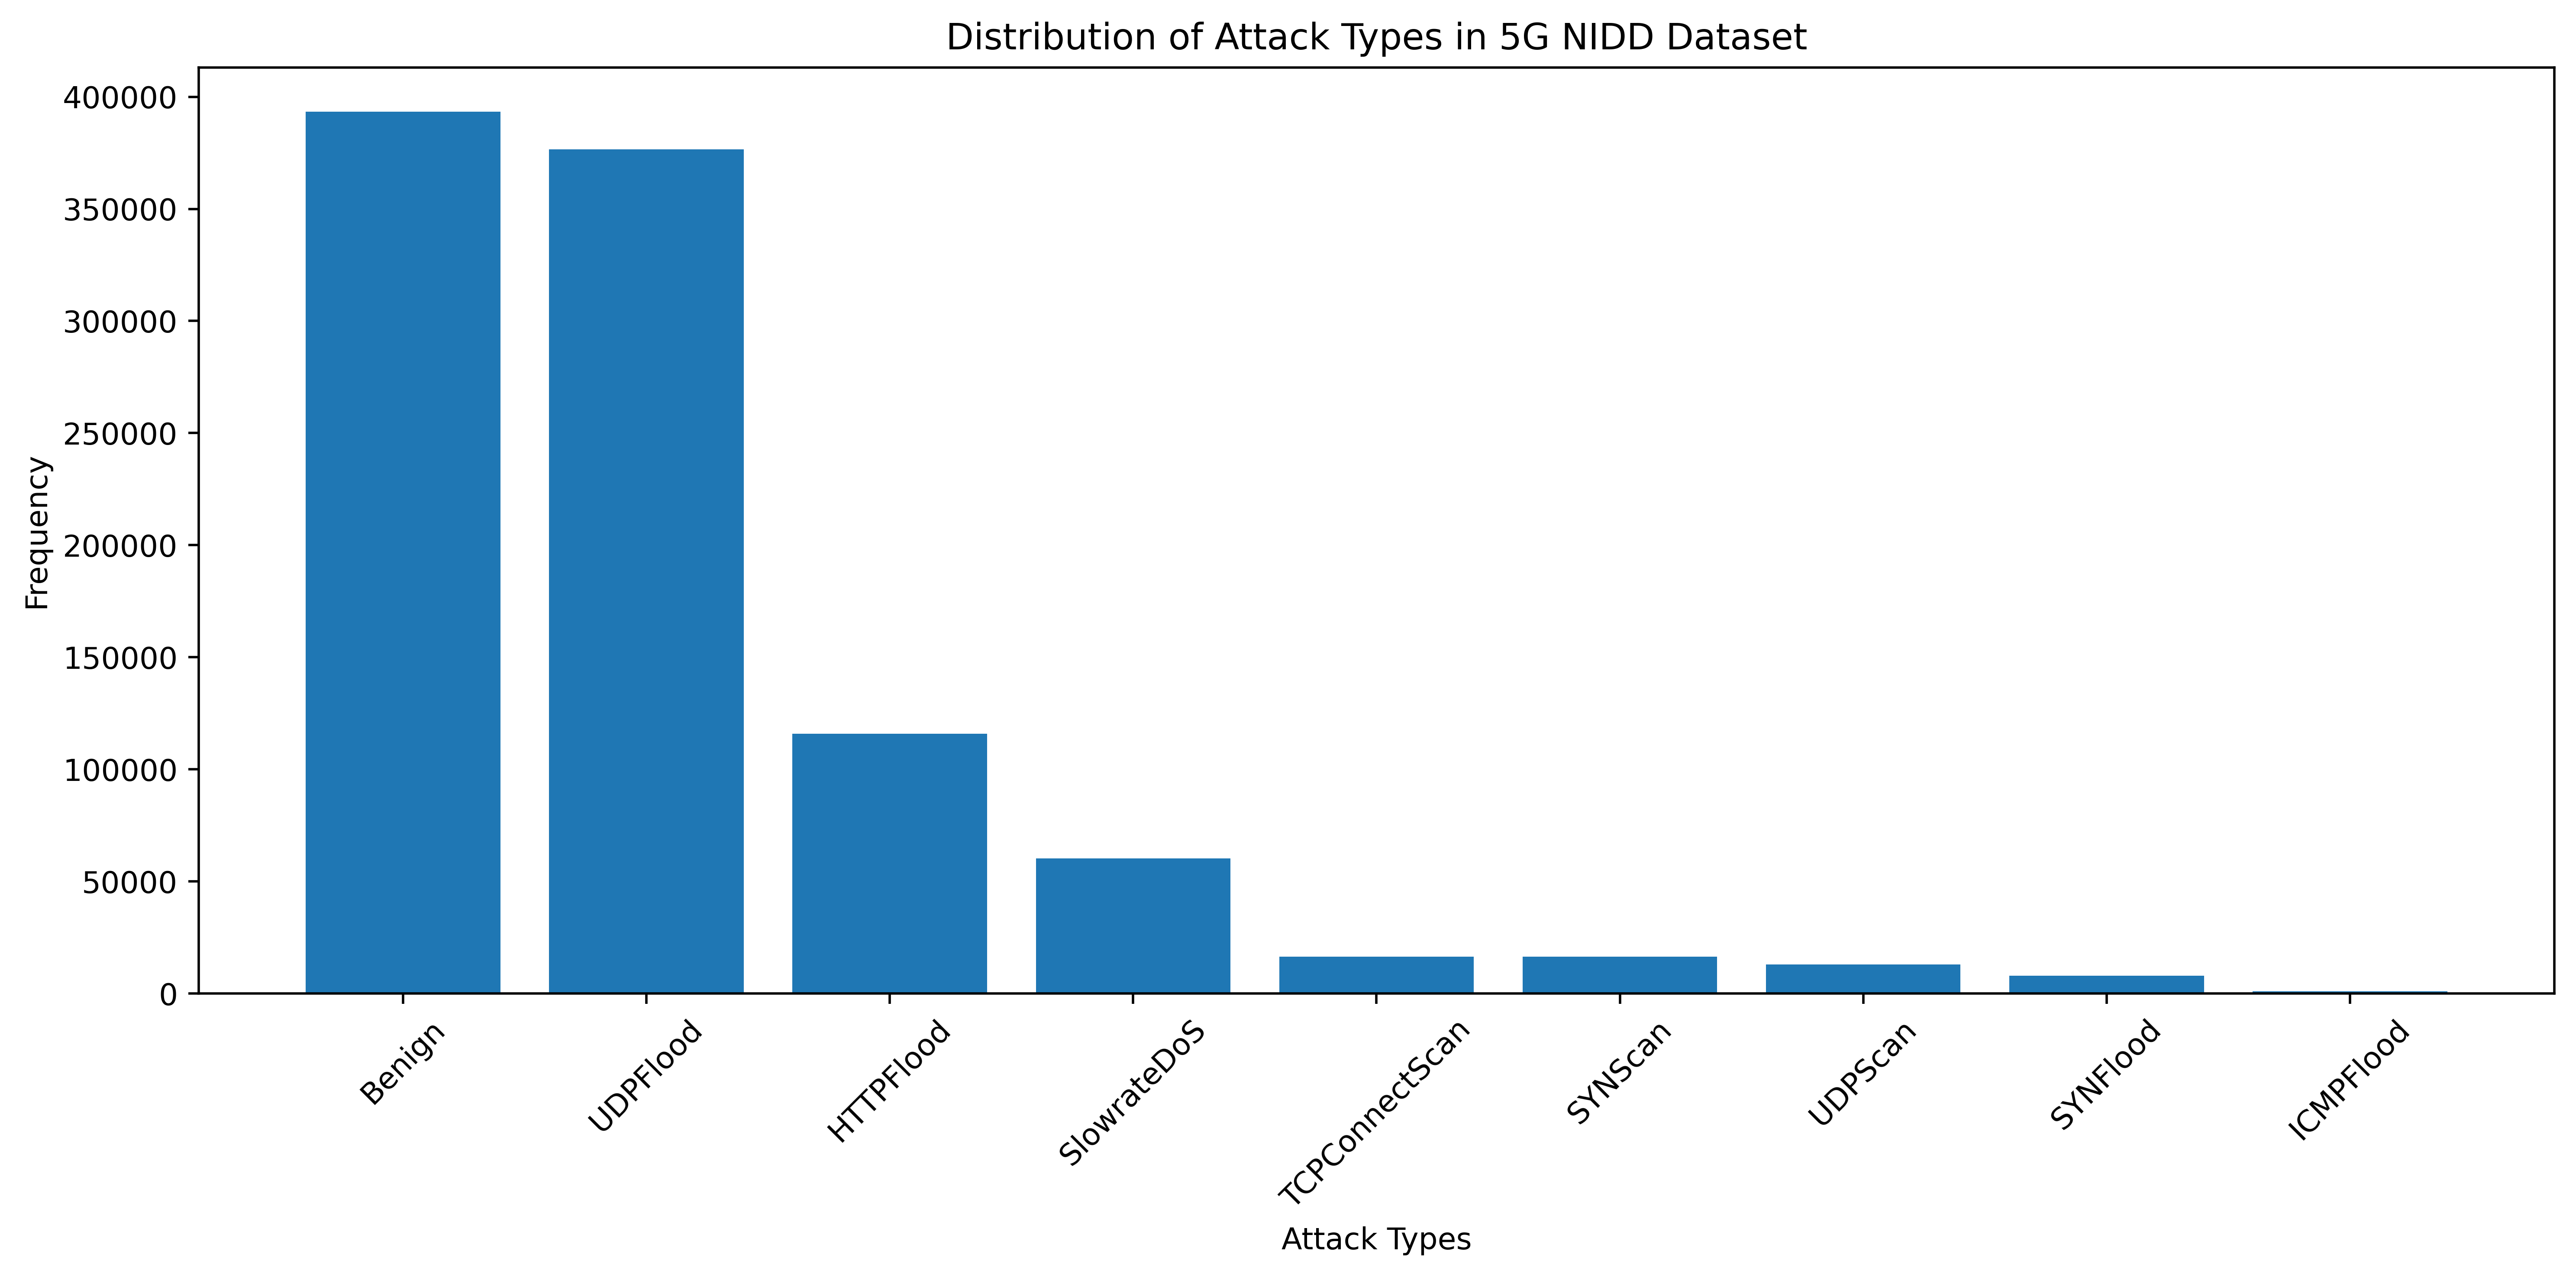

In [18]:
plt.figure(figsize=(12,6), dpi = 500)
plt.bar(x = labels, height = label_frequencies)
plt.xlabel('Attack Types')
plt.ylabel('Frequency')
plt.title('Distribution of Attack Types in 5G NIDD Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(
    os.path.join('Data', 'Figures', '5G NIDD', 'attack_type_distribution.png')
)
plt.show()


### SMOTE

In [19]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [20]:
label_frequencies = []
labels = []
for attack in np.unique(y_resampled):
    frequency = len(y_resampled[y_resampled == attack])
    label_frequencies.append(frequency)
    labels.append(str(output_encoder.inverse_transform(np.expand_dims(np.array(attack), axis = 0))[0]))

In [21]:
sorted_indices = np.argsort(label_frequencies)[::-1]
label_frequencies = [label_frequencies[i] for i in sorted_indices]
labels = [labels[i] for i in sorted_indices]

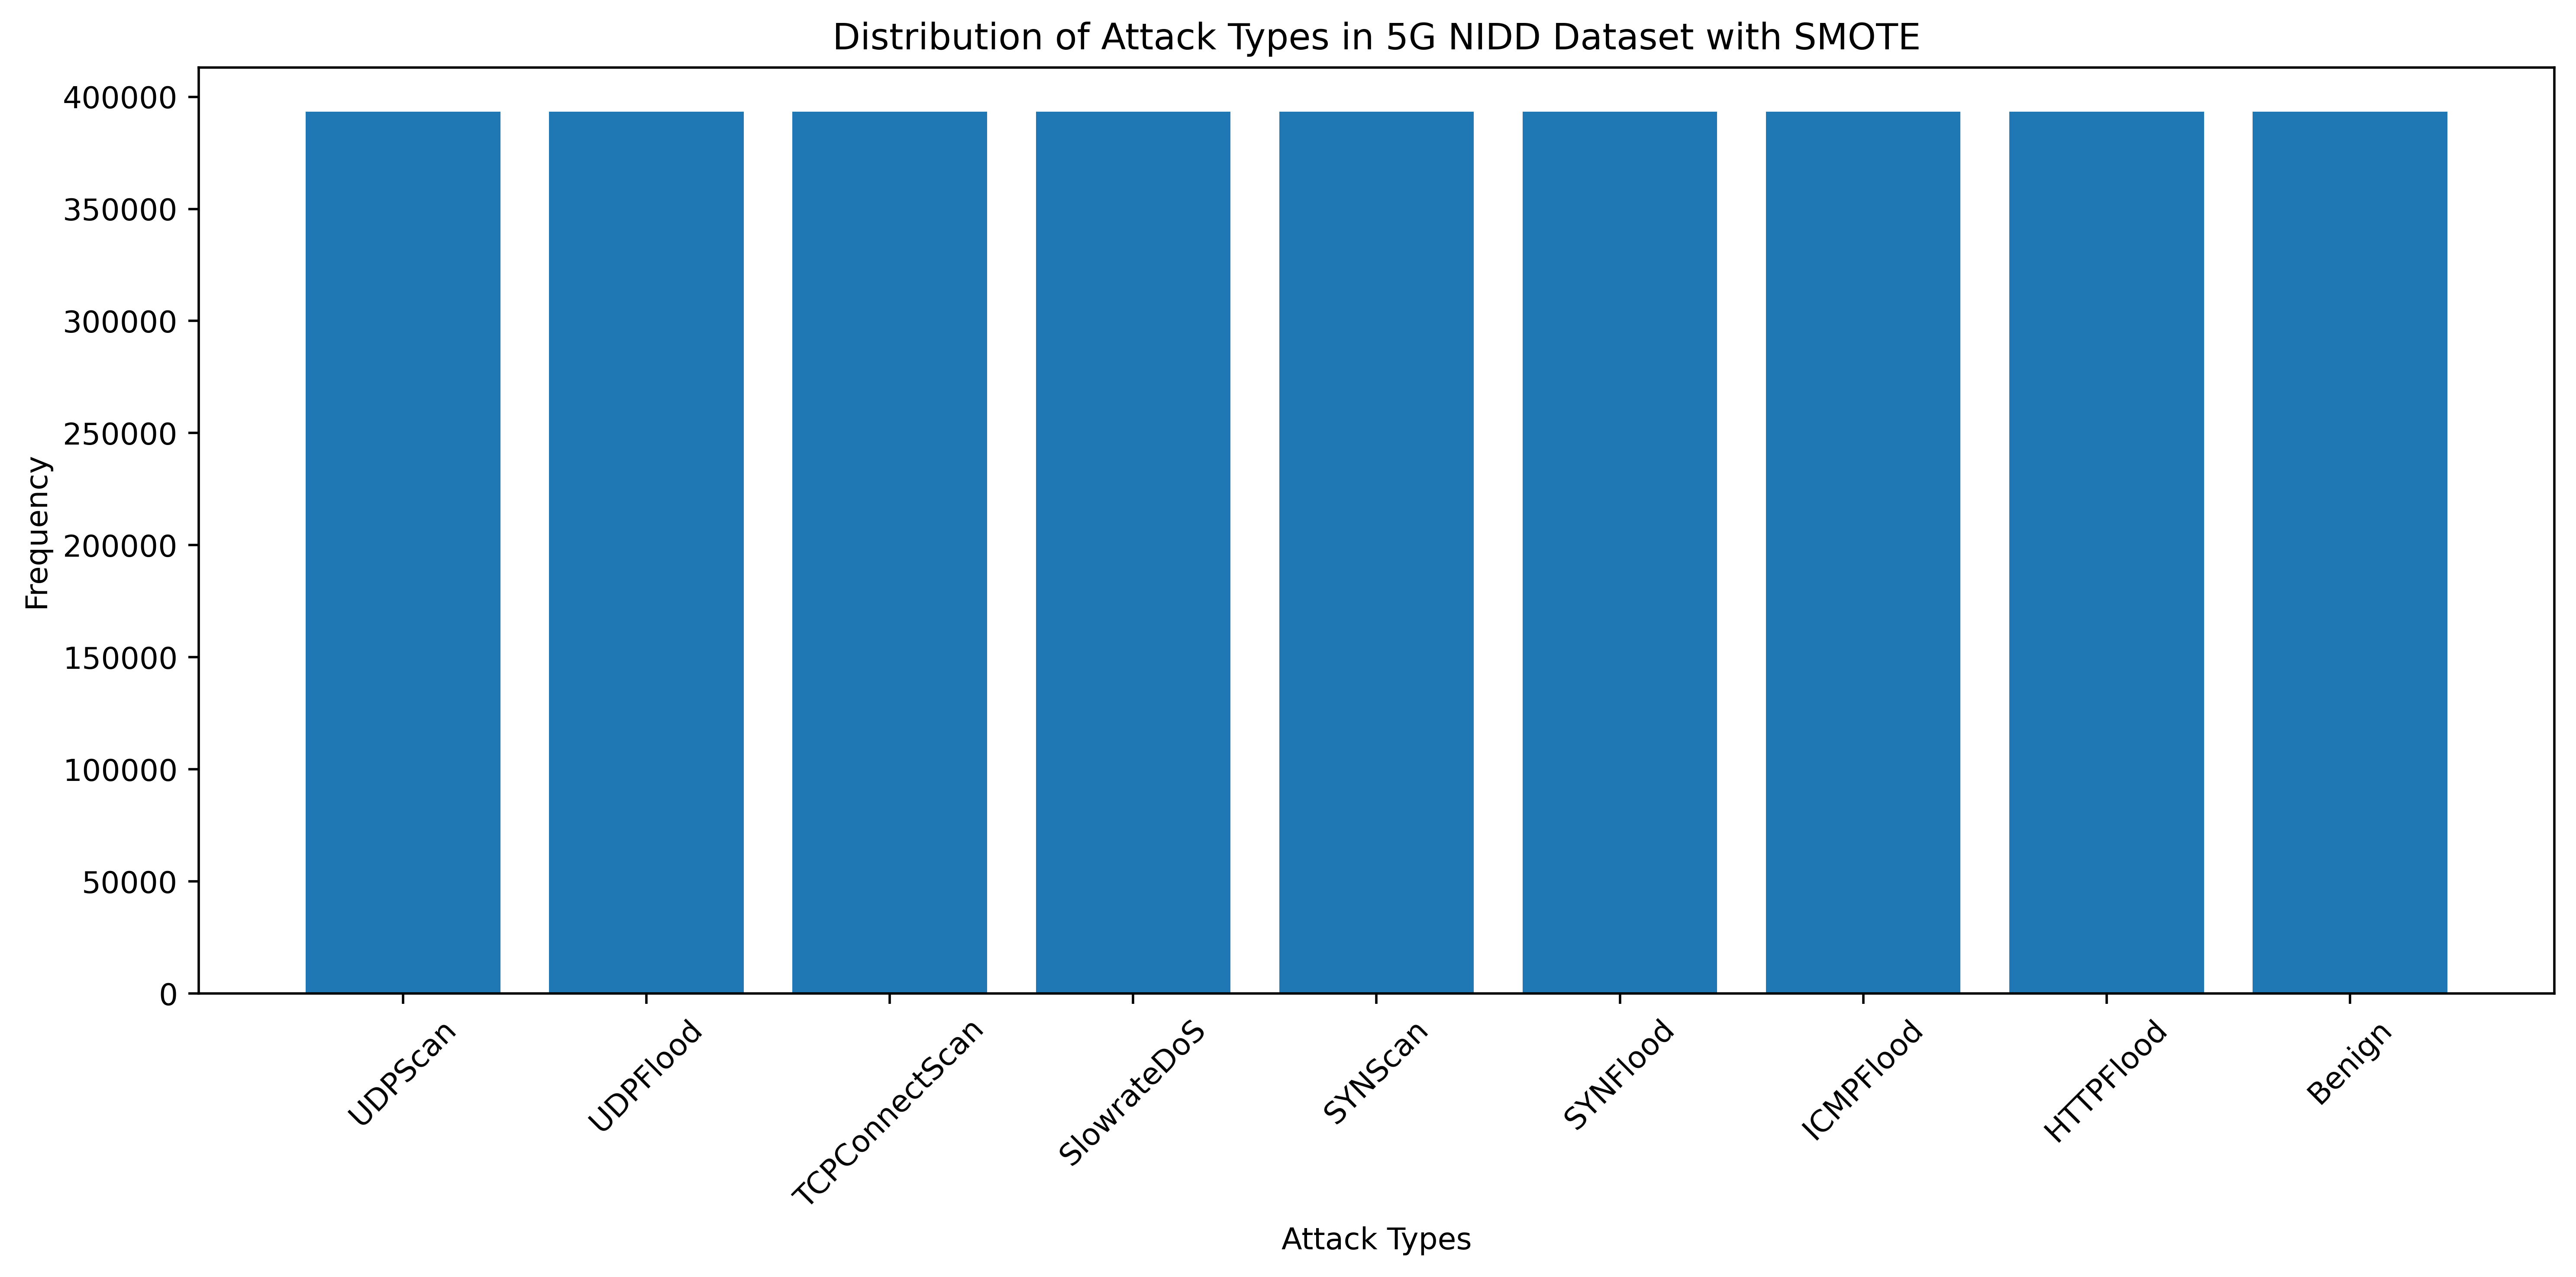

In [22]:
plt.figure(figsize=(12,6), dpi = 500)
plt.bar(x = labels, height = label_frequencies)
plt.xlabel('Attack Types')
plt.ylabel('Frequency')
plt.title('Distribution of Attack Types in 5G NIDD Dataset with SMOTE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(
    os.path.join('Data', 'Figures', '5G NIDD', 'attack_type_distribution_with_SMOTE.png')
)
plt.show()


## PCA

In [23]:
pca = PCA(n_components=0.9)
X_train_resampled_pca = pca.fit_transform(X_resampled)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)
print(pca.explained_variance_ratio_, pca.n_components_, sep = '\n')

[0.20334222 0.1237733  0.10809718 0.09628308 0.0753045  0.07144898
 0.05361441 0.04009399 0.03008808 0.02590487 0.02190359 0.02048862
 0.01950798 0.01723409]
14


/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in 

# Training

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.multiclass import OneVsRestClassifier

## Logistic Regression

In [25]:
linear_model = LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)
linear_model.fit(X_train_resampled_pca, y_resampled)

/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_mo

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [26]:
y_pred = linear_model.predict(X_val_pca)

/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [27]:
accuracy_score(y_val, y_pred)

0.9568856638190978

In [28]:
np.unique(y_val)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [29]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

## Random Forest

In [30]:
rnd_forest = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1)
rnd_forest.fit(X_train_resampled_pca, y_resampled)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
rnd_forest.predict(X_test_pca)

array([1, 3, 7, ..., 7, 0, 0], shape=(182384,))

In [32]:
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.9568856638190978

## SVM

In [33]:
svc = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)


### Use One-vs-Rest classifier

In [35]:
ovr_classifier = OneVsRestClassifier(estimator=svc, n_jobs=-1)
ovr_classifier.fit(X_train_resampled_pca, y_resampled)

,estimator,SVC(random_state=42)
,n_jobs,-1
,verbose,0
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001


In [36]:
y_pred = ovr_classifier.predict(X_val_pca)
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.9710908845173347